TASK 3: Car Price Prediction with ML

In [37]:
import pandas as pd

In [38]:
df = pd.read_csv('/content/car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [39]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [40]:
df.shape

(301, 9)

In [41]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [42]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [43]:
def value_counts():
    for i in df.columns:
        print(df[i].value_counts())
value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64
2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: Year, dtype: int64
0.45     8
0.60     8
5.25     7
4.50     7
0.20     6
        ..
3.80     1
3.45     1
5.90     1
35.00    1
11.50    1
Name: Selling_Price, Length: 156, dtype: int64
9.40     14
13.60    13
5.70      8
1.47      7
0.51      6
         ..
36.23     1
18.54     1
7.27      1
15.04     1
12.50     1
Name: Present_Price, Length: 148, dtype: int64
45000    9
15000    9
40000    5
35000    5
50000    5
        ..
1400

In [44]:
df.shape

(301, 9)

In [45]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [46]:
df.duplicated().sum()

2

In [47]:
df.drop(columns=['Car_Name'],axis=1,inplace=True)

In [48]:
df

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [49]:
df.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type',
       'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [50]:
numerical_feat =[]
categorical_feat=[]
for i in df.columns:
    if (df[i].dtypes !=object):
        numerical_feat.append(i)
    else:
        categorical_feat.append(i)

In [51]:
df.dtypes

Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [52]:
numerical_feat

['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
len(categorical_feat)

3

In [55]:
categorical_feat

['Fuel_Type', 'Selling_type', 'Transmission']

In [56]:
numerical_feat#remove price

['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']

In [57]:
len(numerical_feat)

5

In [58]:
df.corr()

<ipython-input-58-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Year,Selling_Price,Present_Price,Driven_kms,Owner
Year,1.000000,0.236141,-0.047192,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878914,0.029187,-0.088344
Present_Price,-0.047192,0.878914,1.000000,0.203618,0.008058
Driven_kms,-0.524342,0.029187,0.203618,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008058,0.089216,1.000000


<ipython-input-59-196c0e60d4da>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(), annot=True, linewidths=.2)


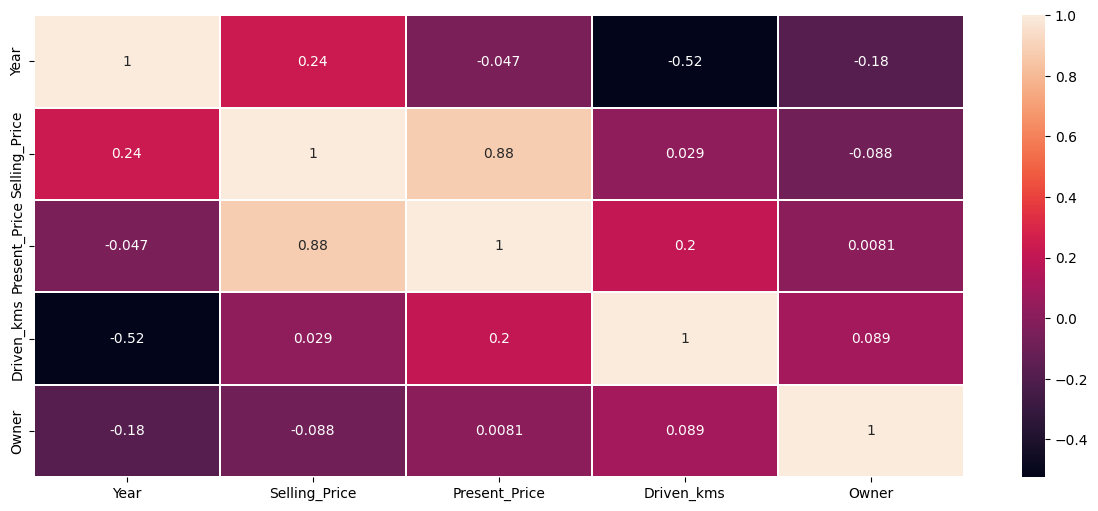

In [59]:
plt.figure(figsize = (15,6))
ax = sns.heatmap(df.corr(), annot=True, linewidths=.2)


In [60]:
df[categorical_feat].head()

,Fuel_Type,Selling_type,Transmission
0,Petrol,Dealer,Manual
1,Diesel,Dealer,Manual
2,Petrol,Dealer,Manual
3,Petrol,Dealer,Manual
4,Diesel,Dealer,Manual


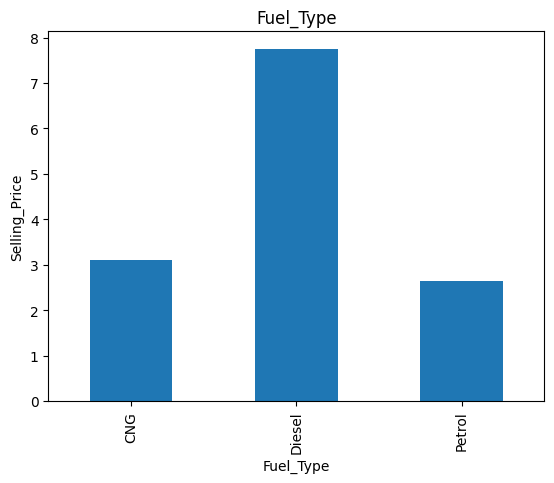

<Figure size 1200x1200 with 0 Axes>

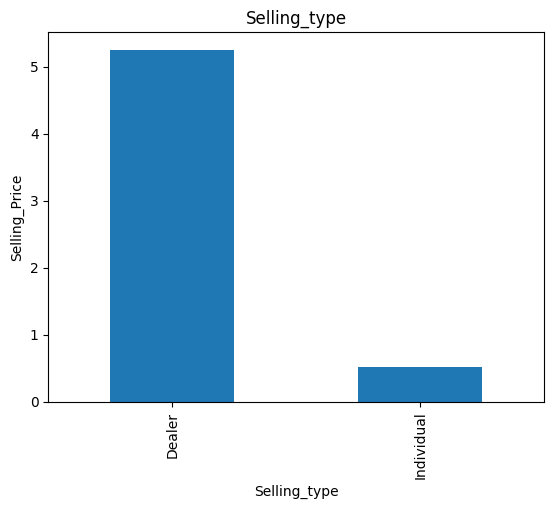

<Figure size 1200x1200 with 0 Axes>

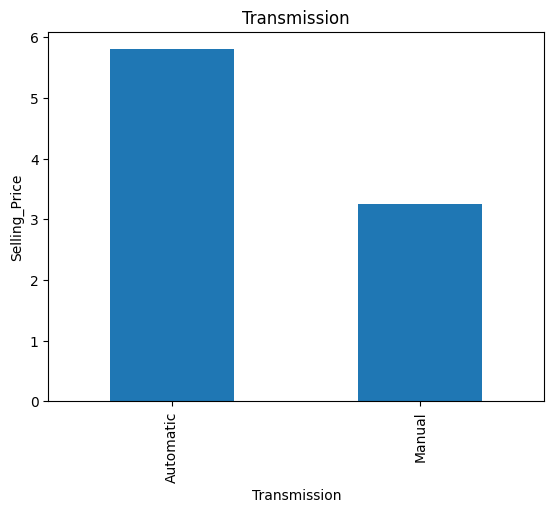

<Figure size 1200x1200 with 0 Axes>

In [61]:
## Lets Find the realtionship between them and Sale PRice

for feature in categorical_feat:
    df.groupby(feature)['Selling_Price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Selling_Price')
    plt.title(feature)
    plt.figure(figsize=(12,12))
    plt.show()

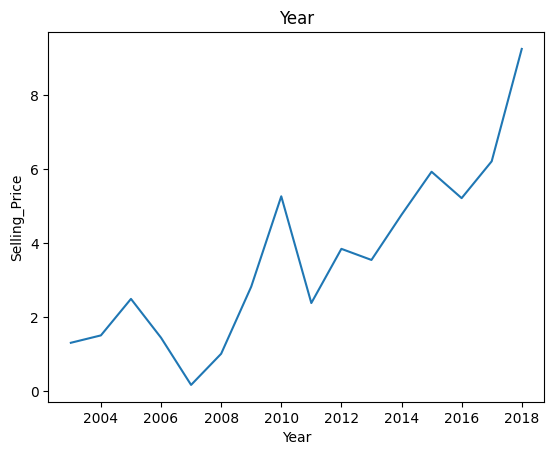

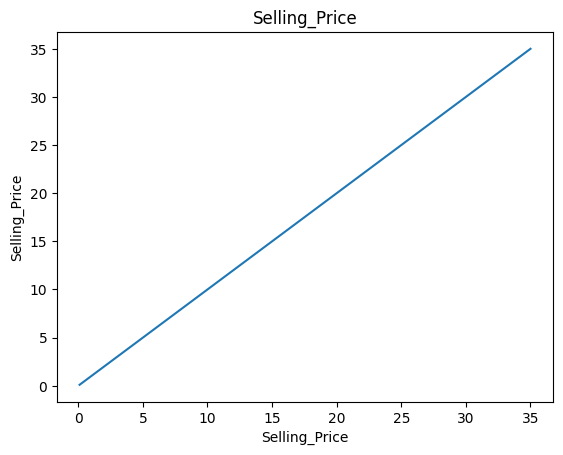

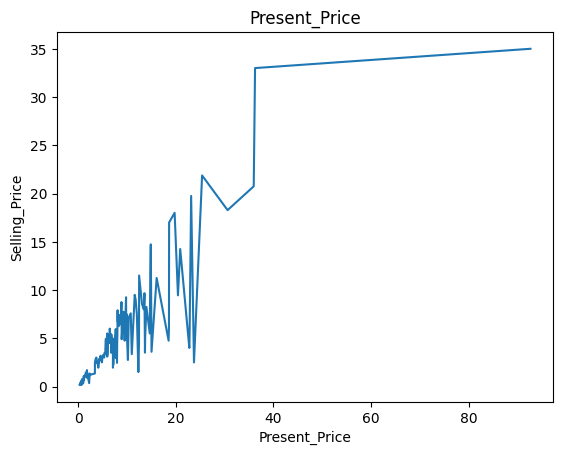

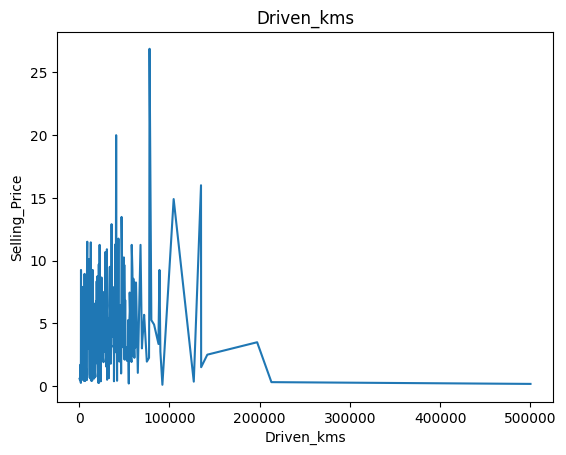

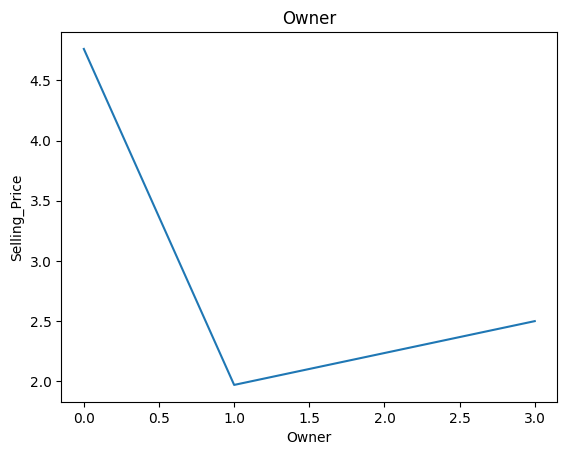

In [62]:
## Lets Find the realtionship between them and Sale PRice

for feature in numerical_feat:
    df.groupby(feature)['Selling_Price'].mean().plot()
    plt.xlabel(feature)
    plt.ylabel('Selling_Price')
    plt.title(feature)
    plt.show()

In [63]:
discrete_feature=[feature for feature in numerical_feat if len(df[feature].unique())<25 and feature not in ['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 2


In [64]:
discrete_feature

['Year', 'Owner']

In [65]:
df[discrete_feature].head()

,Year,Owner
0,2014,0
1,2013,0
2,2017,0
3,2011,0
4,2014,0


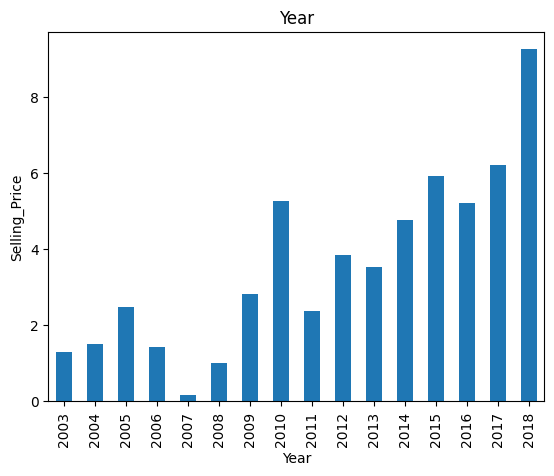

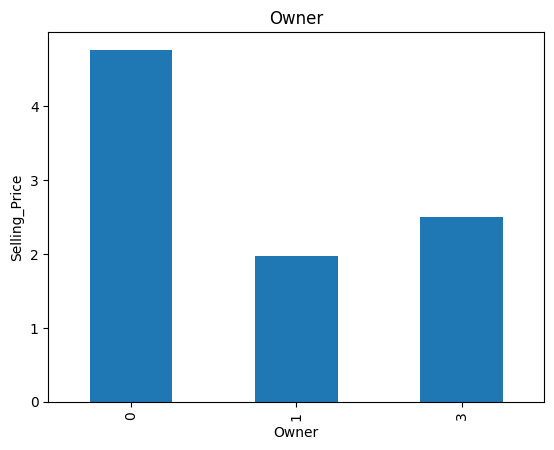

In [66]:
for feature in discrete_feature:
    df.groupby(feature)['Selling_Price'].mean().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Selling_Price')
    plt.title(feature)
    plt.show()

In [67]:
continuous_feature=[feature for feature in numerical_feat if feature not in discrete_feature]
continuous_feature

['Selling_Price', 'Present_Price', 'Driven_kms']

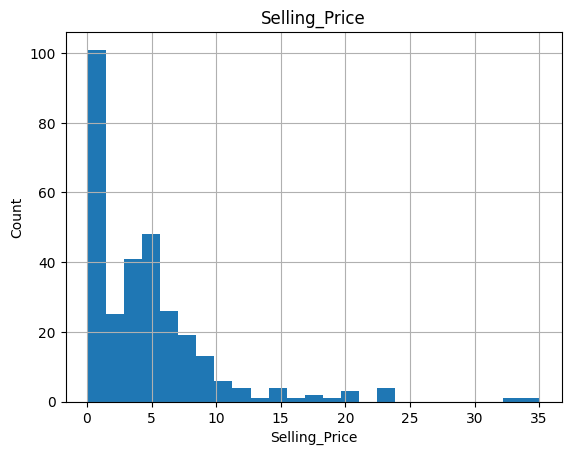

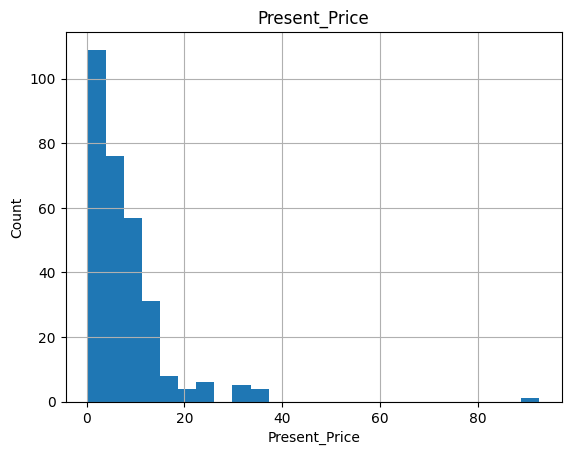

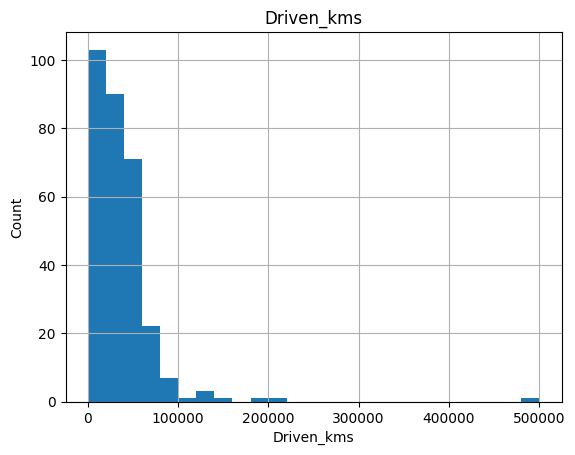

In [68]:
for feature in continuous_feature:
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [69]:
import numpy as np

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


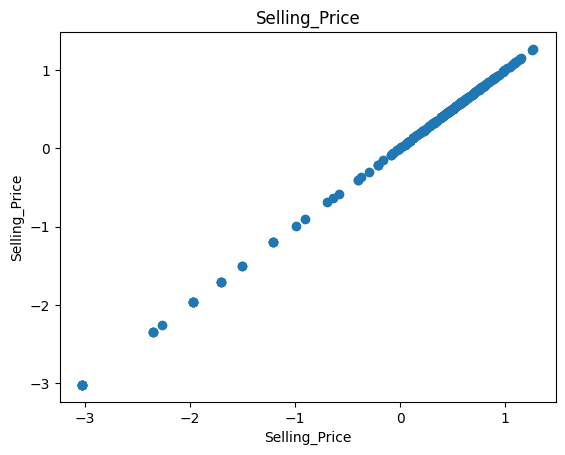

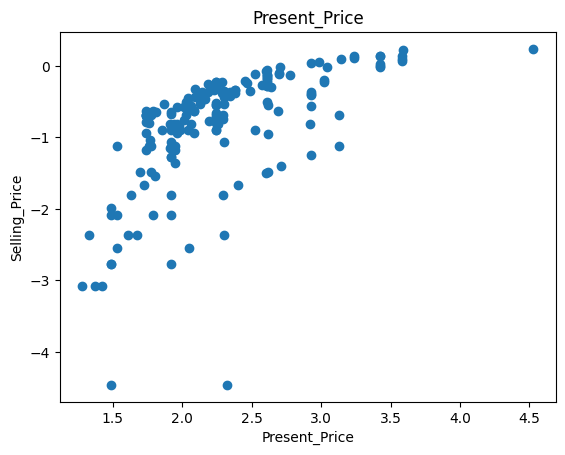

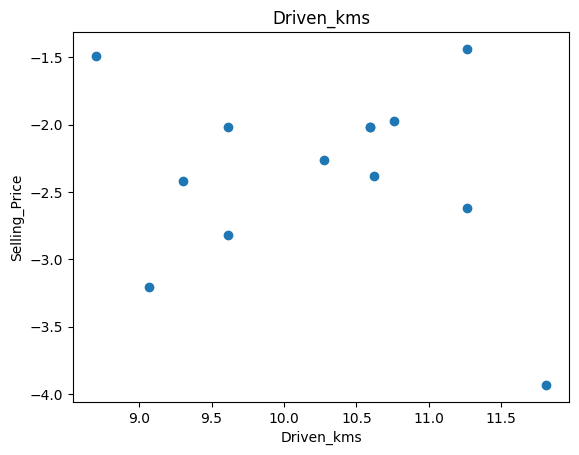

In [70]:
for feature in continuous_feature:
    if 0 in df[feature].unique():
        pass
    else:
        df[feature]=np.log(df[feature])
        df['Selling_Price']=np.log(df['Selling_Price'])
        plt.scatter(df[feature],df['Selling_Price'])
        plt.xlabel(feature)
        plt.ylabel('Selling_Price')
        plt.title(feature)
        plt.show()